# Exercise: 2 different segmentation results (with/without) artificial lighting correction 

In this exercise, we will try out different threshold methods and see how they perform on the same data and create a label image from the binarized image data.

## Recap

**Segmentation** is the process of separating single pixels into different categories that may or may not have specific meaning attached to that. **Thresholding** is a simple, yet often effecte segmentation technique. In thresholding, pixels are separated into two categories - the background and the foreground of an image - by comparing the intensities of each image to a single value, the threshold value. Finding a "good" threshold value is therefore of key importance. 

The output of a thresholding operation is a binary image, consiting of 0s and 1s - which is equivalent to `True` and `False` in terms of boolean values. 

**Vocabulary:** Thresholding is a type of segmentation. Separating the image into two types of pixels (background and foreground) is a type of semantic segmentation, and is - since only two types of pixels exist in the output - referred to as a binarization operation.

**How to code:** Remember - in Python you can compare objects (single numbers or images) to threshold values simply by using the `<` or `>` operator - make sure to put the output into a new variable!

In [1]:
from skimage import data, filters, measure
import matplotlib.pyplot as plt
from skimage.morphology import disk
import napari

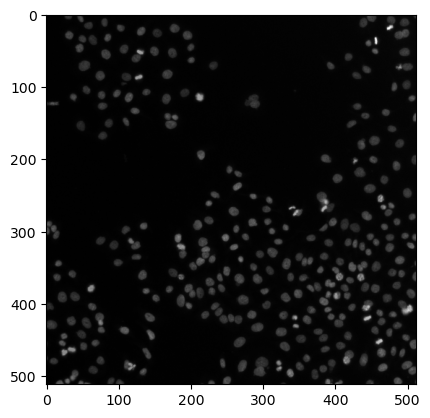

In [2]:
image = data.human_mitosis()
plt.imshow(image, cmap='gray')

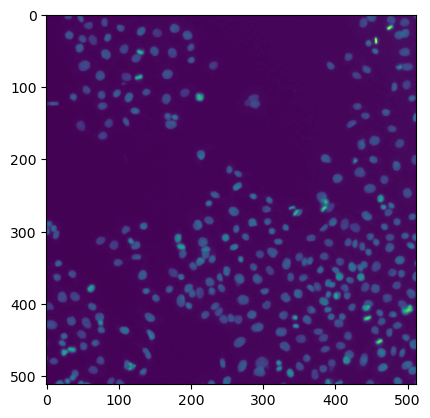

In [3]:
filtered_orig_image = filters.median(image, disk(2))
plt.imshow(filtered_orig_image)

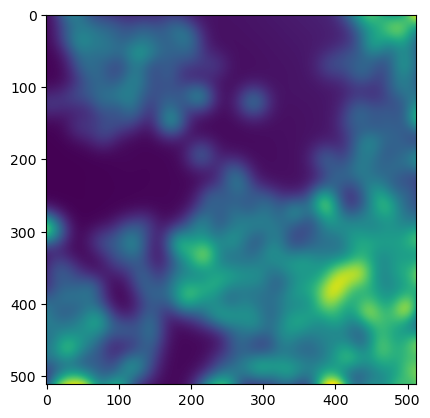

In [4]:
ff_image = filters.gaussian(image, sigma=15)
plt.imshow(ff_image)

## (Pseudo-) Flat-field correction

Flat field correction is using a background image which the original image is divided by. The resulting image is then multiplied with the average intensity of the background. The latter is necessary to normalize the intensities and get back into the original intensity range. 
Correcting a real lighting problem of a microscopic system, your background image should be taken in your microscope by imaging a field of view without a sample (but with the base your sample normally is imaged).
A pseudo-flat-field correction is an artificial way of creating the background image from the original by applying a relatively big gaussian filter on it.


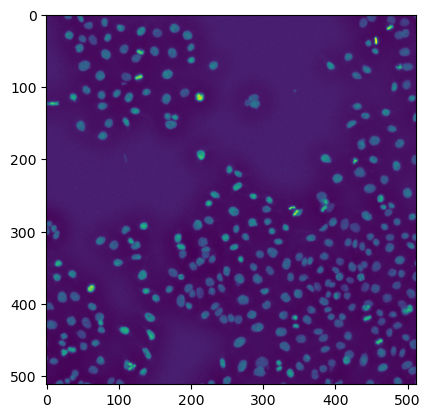

In [5]:
ff_corr_image = image / ff_image * ff_image.mean()
plt.imshow(ff_corr_image)

Now, apply several of the thresholds from `skimage` to the image data! Choose one that you think is suitable.
Hint: You can find them under `filters.threshold_...` - use the `tab` key or the [documentation](https://scikit-image.org/docs/stable/api/skimage.filters.html?highlight=filters#module-skimage.filters) to find out how to use the implemented threshold functions.

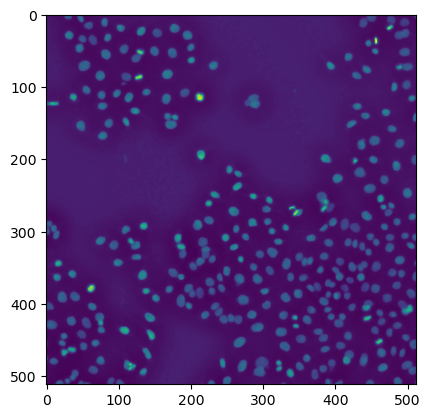

In [6]:
filtered_corr_image = filters.median(ff_corr_image, disk(2))
plt.imshow(filtered_corr_image)

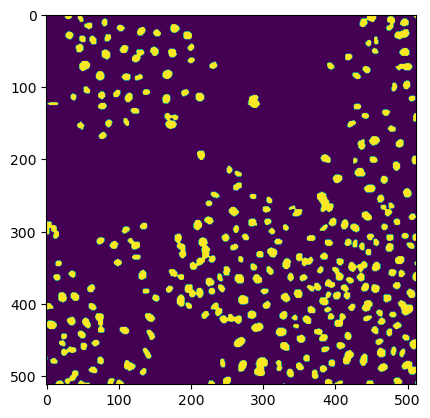

In [7]:
binary_orig_image = filtered_orig_image > filters.threshold_otsu(filtered_orig_image)
binary_corr_image = filtered_corr_image > filters.threshold_otsu(filtered_corr_image)
plt.imshow(binary_orig_image)

Again, use `plt.imshow()` to visualize the results

Now we would like to perform connected-component analysis. Use the appropriate function from skimage (`measure.label()`) for this task!

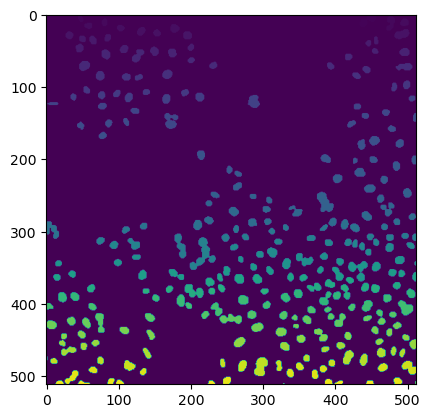

In [8]:
label_orig_image = measure.label(binary_orig_image)
plt.imshow(label_orig_image)

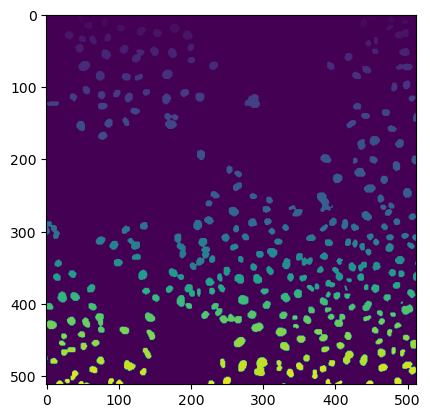

In [9]:
label_corr_image = measure.label(binary_corr_image)
plt.imshow(label_corr_image)

## Visualization in Napari

Check out the difference in segmentation result with and without the pseudo-flat-field correction

In [10]:
viewer = napari.Viewer()

In [11]:
viewer.add_image(image)
viewer.add_image(ff_corr_image)
viewer.add_labels(label_orig_image)
viewer.add_labels(label_corr_image)

<Labels layer 'label_corr_image' at 0x169672e2e80>